# Lab 2 - K-Nearest Neighbors
### Name: Nijatullah Mansoor
### Ron:  2047119

Demonstrate KNN algorithm using sklearn library. The code should implement the following. 
1. Conversion of nominal data to numeric data using label encoder
2. Computation of training and testing error for minimum 3 different values of K.
3. Data preprocessing using standard scalar or min_max scalar
4. Accuracy and confusion matrix.

you can get the dataset <a href='https://archive.ics.uci.edu/ml/datasets/HCV+data#'> Here</a>.

## What is KNN-Algorithm 

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

# Library loading

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Data Loading

In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## 1. Conversion of nominal data to numeric data using label encoder

Let's perform data cleaning first.

In [14]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

Let's drop the null values.

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  589 non-null    int64  
 1   Category    589 non-null    object 
 2   Age         589 non-null    int64  
 3   Sex         589 non-null    object 
 4   ALB         589 non-null    float64
 5   ALP         589 non-null    float64
 6   ALT         589 non-null    float64
 7   AST         589 non-null    float64
 8   BIL         589 non-null    float64
 9   CHE         589 non-null    float64
 10  CHOL        589 non-null    float64
 11  CREA        589 non-null    float64
 12  GGT         589 non-null    float64
 13  PROT        589 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 69.0+ KB


from the result we can see that we have tow nominal attribute that is `Category` and `Sex`.

Lets convert these catagorical data into numerical to make it easy to work with for statistical model.

`Method1`: 

In [43]:
df['Category'] = df['Category'].astype('category')
df['Sex'] = df['Sex'].astype('category')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  589 non-null    int64   
 1   Category    589 non-null    category
 2   Age         589 non-null    int64   
 3   Sex         589 non-null    category
 4   ALB         589 non-null    float64 
 5   ALP         589 non-null    float64 
 6   ALT         589 non-null    float64 
 7   AST         589 non-null    float64 
 8   BIL         589 non-null    float64 
 9   CHE         589 non-null    float64 
 10  CHOL        589 non-null    float64 
 11  CREA        589 non-null    float64 
 12  GGT         589 non-null    float64 
 13  PROT        589 non-null    float64 
dtypes: category(2), float64(10), int64(2)
memory usage: 77.5 KB


Using select_dtypes to select the columns, and then applying `.cat.codes`on each of these column

In [45]:
category_columns = df.select_dtypes(['category']).columns

In [46]:
category_columns

Index(['Category', 'Sex'], dtype='object')

In [47]:
df[category_columns] = df[category_columns].apply(lambda x: x.cat.codes)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  589 non-null    int64  
 1   Category    589 non-null    int8   
 2   Age         589 non-null    int64  
 3   Sex         589 non-null    int8   
 4   ALB         589 non-null    float64
 5   ALP         589 non-null    float64
 6   ALT         589 non-null    float64
 7   AST         589 non-null    float64
 8   BIL         589 non-null    float64
 9   CHE         589 non-null    float64
 10  CHOL        589 non-null    float64
 11  CREA        589 non-null    float64
 12  GGT         589 non-null    float64
 13  PROT        589 non-null    float64
dtypes: float64(10), int64(2), int8(2)
memory usage: 77.1 KB


In [51]:
df.Category.unique()

array([0, 1, 2, 3, 4], dtype=int8)

In [52]:
df.Sex.unique()

array([1, 0], dtype=int8)

#The second method you can use 

`pd.factorize(['a','b','c','a'])[0]`

The output is 

`array([0, 1, 2, 0], dtype=int64)`

Now our data is ready to be analysis. 

## Data Visualization and Analysis

We can easily explore our data using visualization techniques:

In [58]:
df.describe()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,298.648557,0.303905,47.417657,0.616299,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153
std,174.142507,0.944552,9.931334,0.486700,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883
min,1.000000,0.000000,23.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,149.000000,0.000000,39.000000,0.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,296.000000,0.000000,47.000000,1.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,448.000000,0.000000,54.000000,1.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,613.000000,4.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000


In [182]:
df1 = df[['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST']]

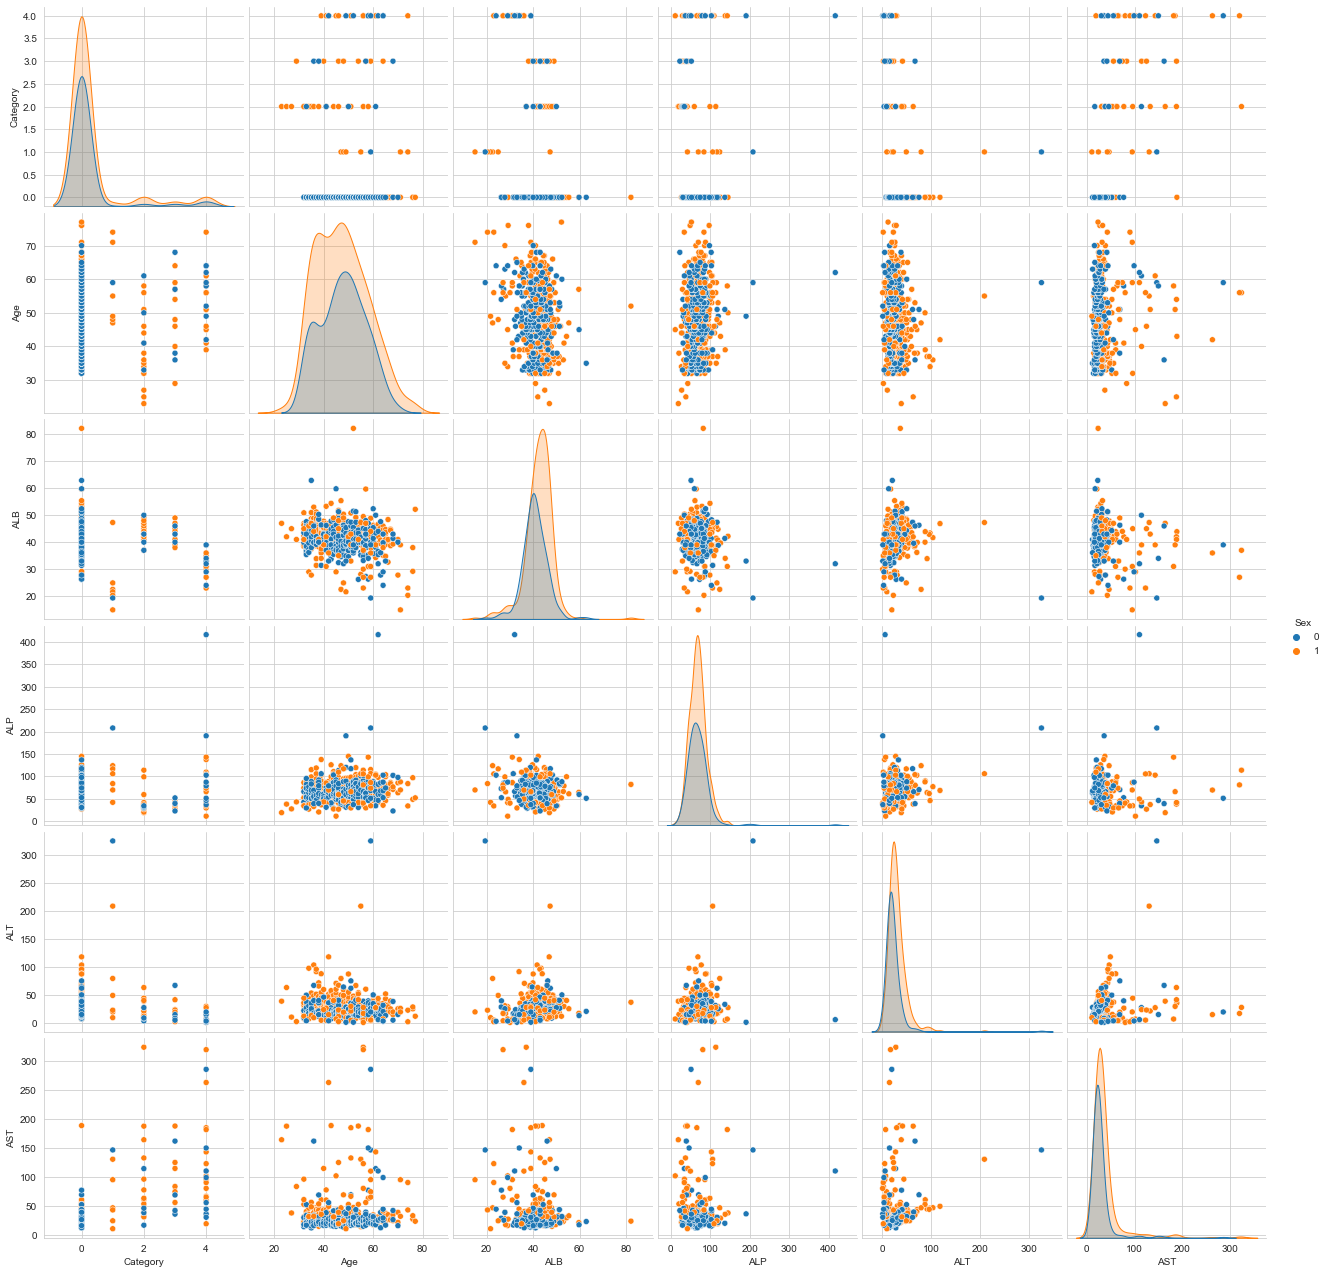

In [183]:
sns.set_style('whitegrid')
sns.pairplot(df1, hue='Sex', height=3)
plt.show()

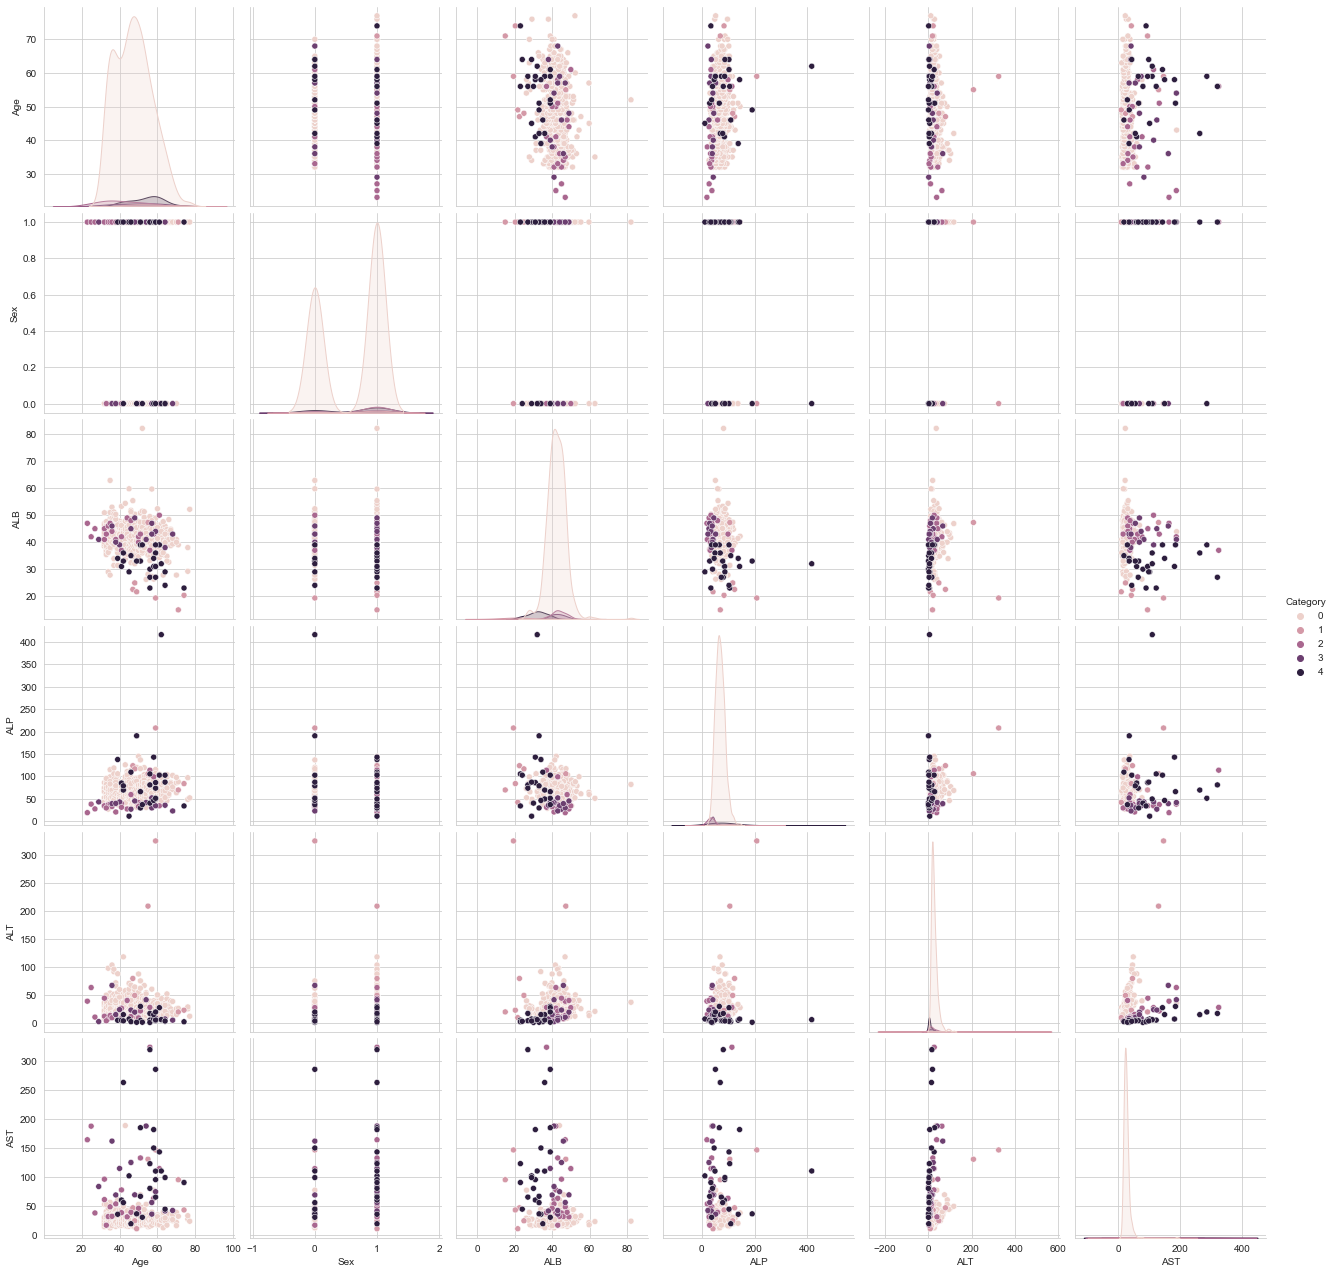

In [184]:
sns.set_style('whitegrid')
sns.pairplot(df1, hue='Category', height=3)
plt.show()

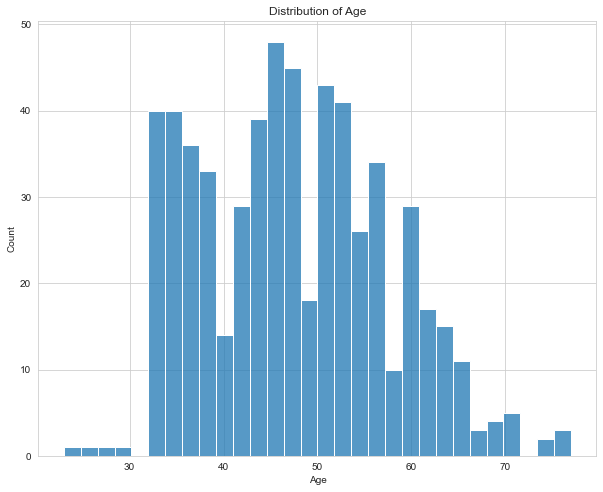

In [211]:
plt.figure(figsize=(10,8))
sns.histplot(df['Age'], bins=30)
#df.hist(column='Age', bins=30)
plt.title("Distribution of Age")
plt.show()

Let’s see how many of each Category is in our data set

In [55]:
tests_counts_by_cate = df.Category.value_counts() #Count the number of test subjects in each category
tests_counts_by_cate

0    526
4     24
2     20
3     12
1      7
Name: Category, dtype: int64

Let’s see how many of each Sex is in our data set.

In [56]:
tests_counts_by_cate = df.Sex.value_counts() #Count the number of test subjects in each gender
tests_counts_by_cate

1    363
0    226
Name: Sex, dtype: int64

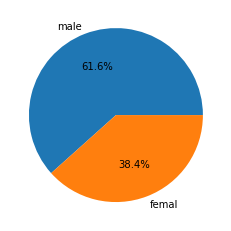

In [75]:
plt.pie(tests_counts_by_cate,labels=['male','femal'],autopct='%1.1f%%')
plt.show()

## Data preprocessing using standard scalar or min_max scalar

## Feature set

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

Let's define feature sets, X:

In [76]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [78]:
X = df[['Age', 'ALB', 'ALP', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] .values  #.astype(float)
X

array([[ 32. ,  38.5,  52.5, ..., 106. ,  12.1,  69. ],
       [ 32. ,  38.5,  70.3, ...,  74. ,  15.6,  76.5],
       [ 32. ,  46.9,  74.7, ...,  86. ,  33.2,  79.3],
       ...,
       [ 62. ,  32. , 416.6, ...,  55.7, 650.9,  68.5],
       [ 64. ,  24. , 102.8, ...,  63. ,  35.9,  71.3],
       [ 64. ,  29. ,  87.3, ...,  66.7,  64.2,  82. ]])

Lets check our lables.

In [81]:
y1 = df['Sex'].values
y1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [82]:
y2 = df['Category'].values
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Normalize Data

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [83]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.55374517, -0.54270146, -0.60323005, -0.90549379, -0.35545693,
        -0.20228893, -0.58177708, -1.91609052,  0.48033581, -0.48102205,
        -0.54078756],
       [-1.55374517, -0.54270146,  0.08405364, -0.41138002, -0.27628268,
        -0.40928316,  1.35499299, -0.52424085, -0.15140186, -0.4165134 ,
         0.86256616],
       [-1.55374517,  0.91641697,  0.25394399,  0.46171419,  0.57331796,
        -0.28278669,  0.29068302, -0.16962947,  0.08549977, -0.09212705,
         1.38648489],
       [-1.55374517,  0.27371004, -0.62253577,  0.19306982, -0.34023111,
         0.45319281, -0.39906292, -0.57743256, -0.03295105, -0.08106842,
         0.7128751 ],
       [-1.55374517, -0.42110826,  0.23077712,  0.28901424, -0.27323751,
        -0.0815423 ,  0.43228649, -0.94977451, -0.11191825, -0.15294949,
        -0.59692171]])

## Computation of training and testing error for minimum 3 different values of K.

## Train Test Split

In [159]:
#for gender
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split( X, y1, test_size=0.2, random_state=4)
print ('Train set:', X1_train.shape,  y1_train.shape)
print ('Test set:', X1_test.shape,  y1_test.shape)

Train set: (471, 11) (471,)
Test set: (118, 11) (118,)


In [160]:
# for category
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split( X, y2, test_size=0.2, random_state=4)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (471, 11) (471,)
Test set: (118, 11) (118,)


## Classification

In [109]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Let's start the algorithm with k=4:

In [161]:
k = 4
#Train Model and Predict  
nigh_gender = KNeighborsClassifier(n_neighbors = k).fit(X1_train,y1_train)
nigh_gender

KNeighborsClassifier(n_neighbors=4)

In [162]:
k = 4
#Train Model and Predict  
neigh_cat = KNeighborsClassifier(n_neighbors = k).fit(X2_train,y2_train)
neigh_cat

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:

In [163]:
gender_predict = nigh_gender.predict(X1_test)
gender_predict

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0], dtype=int8)

In [125]:
cat_predict = neigh_cat.predict(X2_test)
cat_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

## Accuracy evaluation and confusion matrix.

##### What is a good accuracy score?
If you are working on a classification problem, the best score is 100% accuracy. If you are working on a regression problem, the best score is 0.0 error. These scores are an impossible to achieve upper/lower bound. All predictive modeling problems have prediction error.

In [126]:
from sklearn import metrics
print("Train set Accuracy for Sex with k value 4: ", metrics.accuracy_score(y1_train, nigh_gender.predict(X1_train)))
print("Test set Accuracy for Sex with k value 4: ", metrics.accuracy_score(y1_test, gender_predict))

Train set Accuracy for Sex with k value 4:  0.7919320594479831
Test set Accuracy for Sex with k value 4:  0.6610169491525424


Similarly we can do for category.

In [127]:
from sklearn import metrics
print("Train set Accuracy for Category with k value 4: ", metrics.accuracy_score(y2_train, neigh_cat.predict(X2_train)))
print("Test set Accuracy for Category with k value 4: ", metrics.accuracy_score(y2_test, cat_predict))

Train set Accuracy for Category with k value 4:  0.9469214437367304
Test set Accuracy for Category with k value 4:  0.8898305084745762


## Mean Squre Error
There are no acceptable limits for MSE except that the lower the MSE the higher the accuracy of prediction as there would be excellent match between the actual and predicted data set.

Let's calculate mean squre error for Gender.

In [117]:
print(metrics.mean_squared_error(y1_test,gender_predict))

0.3389830508474576


Let's calculate mean squre error for category.

In [118]:
print(metrics.mean_squared_error(y2_test,cat_predict))

0.788135593220339


We can see that the less the mean squre error the best the module we can say that the module is best fit for gender classifiction and not best fitted for classifiction of category. 

Let's calculte this for a few more ks.

In [156]:
k = 3
#Train Model and Predict  
nigh_gender = KNeighborsClassifier(n_neighbors = k).fit(X1_train,y1_train)
gender_predict = nigh_gender.predict(X1_test)

print("Train set Accuracy for Sex with k value 3: ", metrics.accuracy_score(y1_train, nigh_gender.predict(X1_train)))
print("Test set Accuracy for Sex with k value 3: ", metrics.accuracy_score(y1_test, gender_predict))
print("The test mean Squre error is:",metrics.mean_squared_error(y1_test,gender_predict))


Train set Accuracy for Sex with k value 3:  0.851380042462845
Test set Accuracy for Sex with k value 3:  0.6440677966101694
The test mean Squre error is: 0.3559322033898305


if we compare the mean squre error for k=4 and k=3 the values for k=3 is more which mean the module is best fit with k=4 value.

In [137]:
k = 3
#Train Model and Predict  
neigh_cat = KNeighborsClassifier(n_neighbors = k).fit(X2_train,y2_train)
cat_predict = neigh_cat.predict(X2_test)

print("Train set Accuracy for Category with k value 4: ", metrics.accuracy_score(y2_train, neigh_cat.predict(X2_train)))
print("Test set Accuracy for Category with k value 4: ", metrics.accuracy_score(y2_test, cat_predict))
print("The mean Squre error is:",metrics.mean_squared_error(y2_test,cat_predict))

Train set Accuracy for Category with k value 4:  0.9532908704883227
Test set Accuracy for Category with k value 4:  0.8983050847457628
The mean Squre error is: 0.7542372881355932


For the category MSE decrease compare the k=4;

Let's check for k=2

In [133]:
k = 2
#Train Model and Predict  
nigh_gender = KNeighborsClassifier(n_neighbors = k).fit(X1_train,y1_train)
gender_predict = nigh_gender.predict(X1_test)

print("Train set Accuracy for Sex with k value 3: ", metrics.accuracy_score(y1_train, nigh_gender.predict(X1_train)))
print("Test set Accuracy for Sex with k value 3: ", metrics.accuracy_score(y1_test, gender_predict))
print("The mean Squre error is:",metrics.mean_squared_error(y1_test,gender_predict))

Train set Accuracy for Sex with k value 3:  0.8301486199575372
Test set Accuracy for Sex with k value 3:  0.6271186440677966
The mean Squre error is: 0.3728813559322034


For category

In [138]:
k = 2
#Train Model and Predict  
neigh_cat = KNeighborsClassifier(n_neighbors = k).fit(X2_train,y2_train)
cat_predict = neigh_cat.predict(X2_test)

print("Train set Accuracy for Category with k value 4: ", metrics.accuracy_score(y2_train, neigh_cat.predict(X2_train)))
print("Test set Accuracy for Category with k value 4: ", metrics.accuracy_score(y2_test, cat_predict))
print("The mean Squre error is:",metrics.mean_squared_error(y2_test,cat_predict))

Train set Accuracy for Category with k value 4:  0.9532908704883227
Test set Accuracy for Category with k value 4:  0.9067796610169492
The mean Squre error is: 0.7457627118644068


Let's chekc for k=5.

In [148]:
k = 5
#Train Model and Predict  
nigh_gender = KNeighborsClassifier(n_neighbors = k).fit(X1_train,y1_train)
gender_predict = nigh_gender.predict(X1_test)

print("Train set Accuracy for Sex with k value 3: ", metrics.accuracy_score(y1_train, nigh_gender.predict(X1_train)))
print("Test set Accuracy for Sex with k value 3: ", metrics.accuracy_score(y1_test, gender_predict))
print("The mean Squre error is:",metrics.mean_squared_error(y1_test,gender_predict))

Train set Accuracy for Sex with k value 3:  0.8089171974522293
Test set Accuracy for Sex with k value 3:  0.711864406779661
The mean Squre error is: 0.288135593220339


In [149]:
k = 5
#Train Model and Predict  
neigh_cat = KNeighborsClassifier(n_neighbors = k).fit(X2_train,y2_train)
cat_predict = neigh_cat.predict(X2_test)

print("Train set Accuracy for Category with k value 4: ", metrics.accuracy_score(y2_train, neigh_cat.predict(X2_train)))
print("Test set Accuracy for Category with k value 4: ", metrics.accuracy_score(y2_test, cat_predict))
print("The mean Squre error is:",metrics.mean_squared_error(y2_test,cat_predict))

Train set Accuracy for Category with k value 4:  0.9426751592356688
Test set Accuracy for Category with k value 4:  0.8898305084745762
The mean Squre error is: 0.788135593220339


In [154]:
k = 7
#Train Model and Predict  
neigh_cat = KNeighborsClassifier(n_neighbors = k).fit(X2_train,y2_train)
cat_predict = neigh_cat.predict(X2_test)

print("Train set Accuracy for Category with k value 4: ", metrics.accuracy_score(y2_train, neigh_cat.predict(X2_train)))
print("Test set Accuracy for Category with k value 4: ", metrics.accuracy_score(y2_test, cat_predict))
print("The mean Squre error is:",metrics.mean_squared_error(y2_test,cat_predict))

Train set Accuracy for Category with k value 4:  0.9363057324840764
Test set Accuracy for Category with k value 4:  0.8983050847457628
The mean Squre error is: 0.7542372881355932


### Let's calculate the accuracy of KNN for different values of k.

In [185]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
mean_sq = np.zeros((ks-1))

for n in range(1,ks):
    gender_neigh = KNeighborsClassifier(n_neighbors=n).fit(X1_train,y1_train)
    gender_pred = gender_neigh.predict(X1_test)
    mean_acc[n-1] = metrics.accuracy_score(y1_test,gender_pred)
    
    mean_sq[n-1] = metrics.mean_squared_error(y1_test,gender_pred)
    std_acc[n-1] = np.std(gender_pred==y1_test)/np.sqrt(gender_pred.shape[0])
    
    
print("mean Squre erro:\n",mean_sq)
print()
print("mean_acc\n",mean_acc)
print()
print("std_acc\n",std_acc)

mean Squre erro:
 [0.34745763 0.37288136 0.3559322  0.33898305 0.28813559 0.30508475
 0.27966102 0.29661017 0.26271186]

mean_acc
 [0.65254237 0.62711864 0.6440678  0.66101695 0.71186441 0.69491525
 0.72033898 0.70338983 0.73728814]

std_acc
 [0.04383432 0.04451631 0.04407663 0.04357669 0.04169232 0.04238724
 0.04131839 0.04204846 0.04051515]


So the best value for k to get high accuracy score is 10 and less mean square error.

Now lets do for the Category.

In [175]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
mean_sq = np.zeros((ks-1))

for n in range(1,ks):
    cat_neigh = KNeighborsClassifier(n_neighbors=n).fit(X2_train,y2_train)
    cat_pred = cat_neigh.predict(X2_test)
    mean_acc[n-1] = metrics.accuracy_score(y2_test,cat_pred)
    
    mean_sq[n-1] = metrics.mean_squared_error(y2_test,cat_pred)
    std_acc[n-1] = np.std(gender_pred==y2_test)/np.sqrt(cat_pred.shape[0])
    
    
print("mean Squre erro:\n",mean_sq)
print()
print("mean_acc\n",mean_acc)
print()
print("std_acc\n",std_acc)

mean Squre erro:
 [0.61864407 0.74576271 0.75423729 0.78813559 0.78813559 0.78813559
 0.75423729 0.76271186 0.88983051]

mean_acc
 [0.90677966 0.90677966 0.89830508 0.88983051 0.88983051 0.88983051
 0.89830508 0.88983051 0.88983051]

std_acc
 [0.04407663 0.04407663 0.04407663 0.04407663 0.04407663 0.04407663
 0.04407663 0.04407663 0.04407663]


In [ ]:
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))

#### Plot the model accuracy for a different number of neighbors.

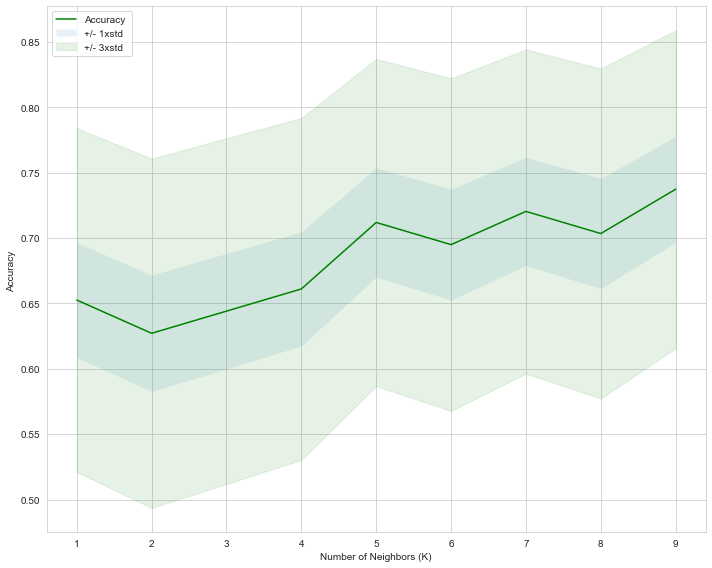

In [197]:
plt.figure(figsize=(10,8))
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1* std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'),loc='upper left')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [198]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7372881355932204 with k= 9


## Confusion matrix

In [201]:
metrics.confusion_matrix(y1_test, gender_pred, labels=[0,1])

array([[31, 19],
       [12, 56]], dtype=int64)

Lets plot this confustion matrix

In [202]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [209]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap,)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.72      0.62      0.67        50
           1       0.75      0.82      0.78        68

    accuracy                           0.74       118
   macro avg       0.73      0.72      0.72       118
weighted avg       0.74      0.74      0.73       118

Confusion matrix, without normalization
[[31 19]
 [12 56]]


<Figure size 432x288 with 0 Axes>

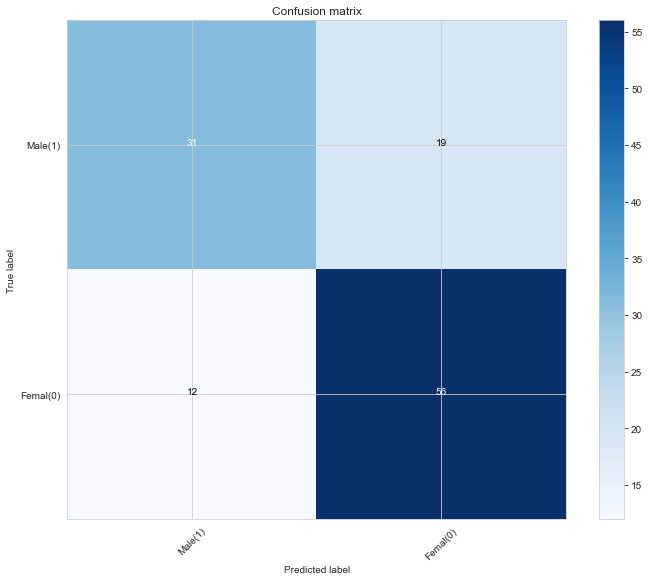

In [210]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y1_test, gender_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y1_test, gender_pred))

# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Male(1)','Femal(0)'],normalize= False,  title='Confusion matrix')